## Problem Description:

The Tunisian Company of Electricity and Gas (STEG) is a public and a non-administrative company, it is responsible for delivering electricity and gas across Tunisia. The company suffered tremendous losses in the order of 200 million Tunisian Dinars due to fraudulent manipulations of meters by consumers.

Using the client’s billing history, the aim of the challenge is to detect and recognize clients involved in fraudulent activities.

The solution will enhance the company’s revenues and reduce the losses caused by such fraudulent activities.

The data provided by STEG is composed of two files. The first one is comprised of client data and the second one contains billing history from 2005 to 2019.

## Variable Definitions:

### Client:

- Client_id: Unique id for client
- District: District where the client is
- Client_catg: Category client belongs to
- Region: Area where the client is
- Creation_date: Date client joined
- Target: fraud:1 , not fraud: 0


### Invoice data

- Client_id: Unique id for the client
- Invoice_date: Date of the invoice
- Tarif_type: Type of tax
- Counter_number:
- Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
- Counter_code:
- Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
- Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
- Consommation_level_1: Consumption_level_1
- Consommation_level_2: Consumption_level_2
- Consommation_level_3: Consumption_level_3
- Consommation_level_4: Consumption_level_4
- Old_index: Old index
- New_index: New index
- Months_number: Month number
- Counter_type: Type of counter

## Data Exploratory

### Load the data

In [23]:
# imports
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [24]:
# train data
path1 = "data/train/client_train.csv"
path2 = "data/train/invoice_train.csv"

# test data
path3 = "data/test/client_test.csv"
path4 = "data/test/invoice_test.csv"

In [25]:
# train tables
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

### Checking the Client Dateset

In [26]:
df1.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [28]:
df1.nunique()

disrict               4
client_id        135493
client_catg           3
region               25
creation_date      8088
target                2
dtype: int64

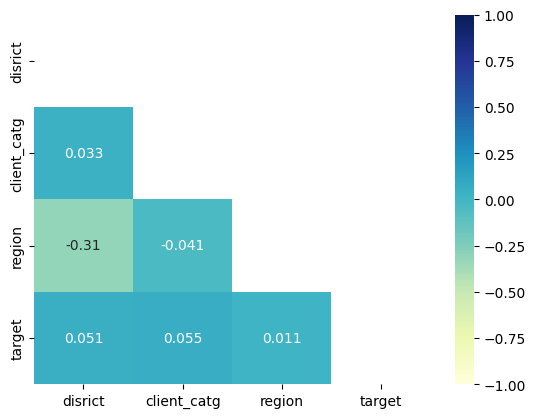

In [29]:
# Correlation heatmap for the client dataset
correlations = df1.corr()
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");

There are no linear correlation between the "district", "client_catg", "region".

<AxesSubplot:xlabel='target', ylabel='count'>

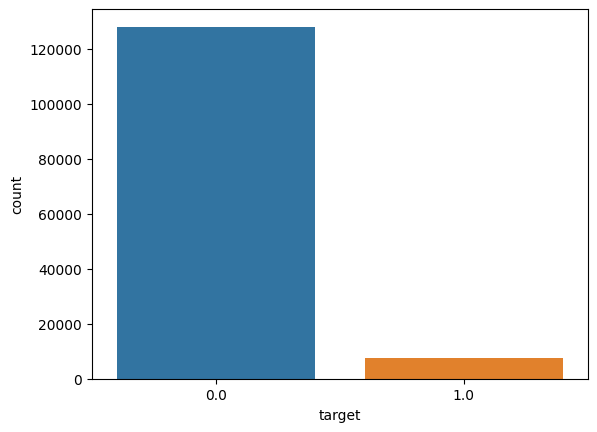

In [30]:
# Distribution of 'target'
sns.countplot(data=df1, x='target')

<AxesSubplot:xlabel='disrict', ylabel='count'>

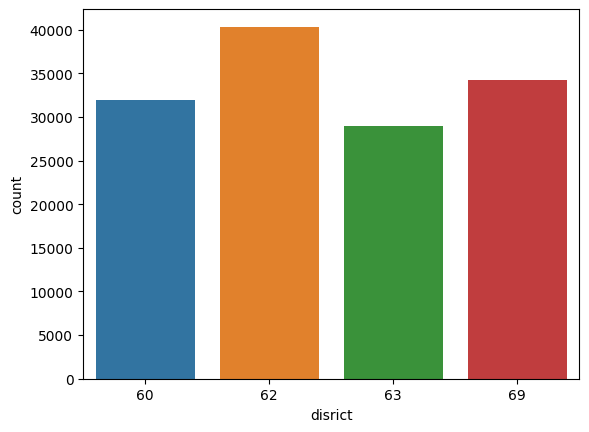

In [31]:
# Distribution of 'disrict'
sns.countplot(data=df1, x='disrict')

<AxesSubplot:xlabel='region', ylabel='count'>

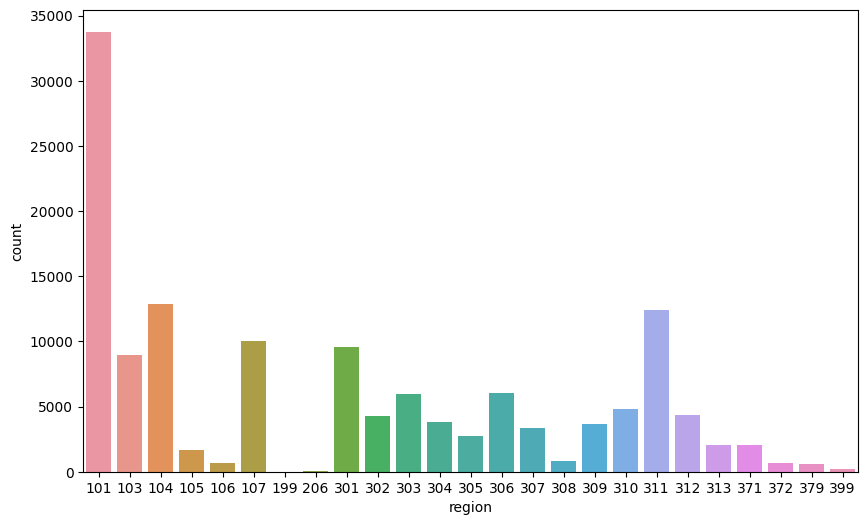

In [32]:
# Distribution of 'region'
plt.figure(figsize=[10,6])
sns.countplot(data=df1, x='region')

<AxesSubplot:xlabel='client_catg', ylabel='count'>

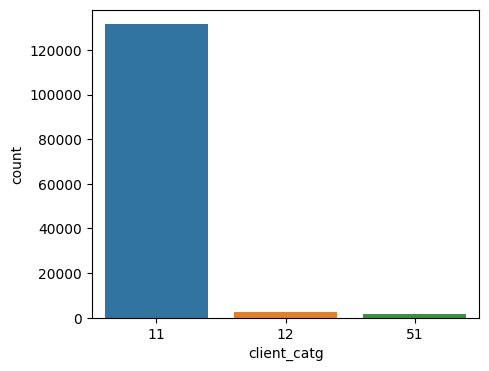

In [33]:
# Client category distribution
plt.figure(figsize=[5,4])
sns.countplot(data=df1, x='client_catg')

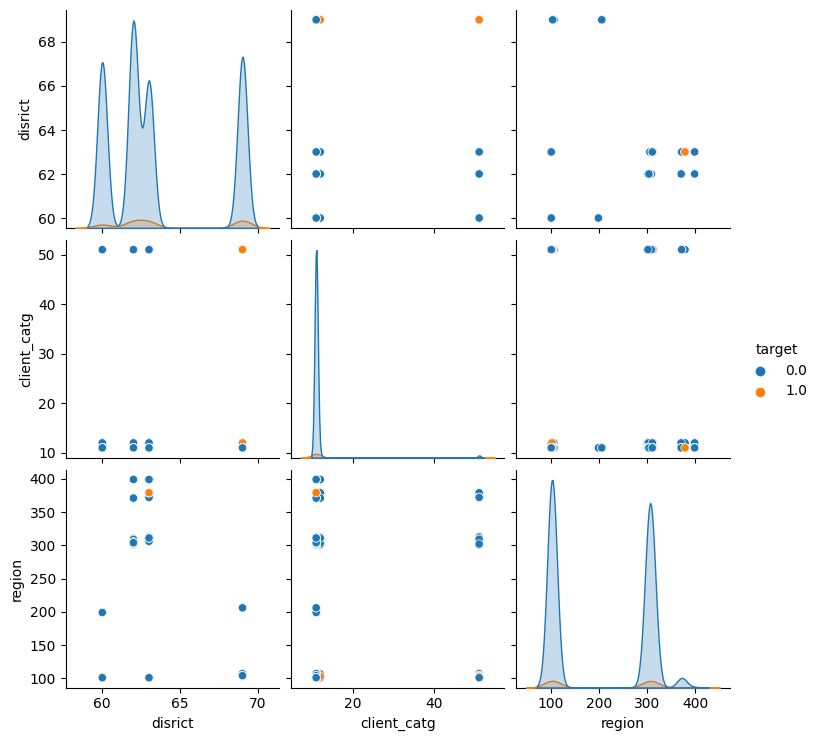

In [34]:
# Check correlation of the features in client dateset respect to the 'target'
sns.pairplot(df1,hue="target")

In [35]:
# Percentage of the fraud customers 
len(df1[df1['target']==1]) / len(df1)

0.05584052312665599

### Checking the Invoice Dataset

In [36]:
df2.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [37]:
df2.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [39]:
df2.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              16
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

The data type of the "invoice_date" is object. We will transform them to the right datetime type. Then we could extract the year and month information from that column.

In [41]:
# Change "date" dtype to datetime with format %Y/%m/%d
df2['invoice_date'] = pd.to_datetime(df2['invoice_date'], format='%Y-%m-%d')

# extract year, month information out of the column date and build new column for each
df2['invoice_year']=df2['invoice_date'].dt.year
df2['invoice_month']=df2['invoice_date'].dt.month

In [42]:
df2['invoice_month'].value_counts()

5     418888
2     417463
4     409188
3     402018
1     380355
6     366846
11    359718
7     354866
8     352748
10    348190
9     336636
12    329833
Name: invoice_month, dtype: int64

In [43]:
df2.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,invoice_year,invoice_month
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,2014,3
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,2013,3
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,2015,3
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,2015,7
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,2016,11


In [44]:
# Check the unique values in the column 'tarif_type'
df2['tarif_type'].value_counts()

11    2679872
40    1379755
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
42          1
27          1
Name: tarif_type, dtype: int64

<AxesSubplot:xlabel='tarif_type', ylabel='count'>

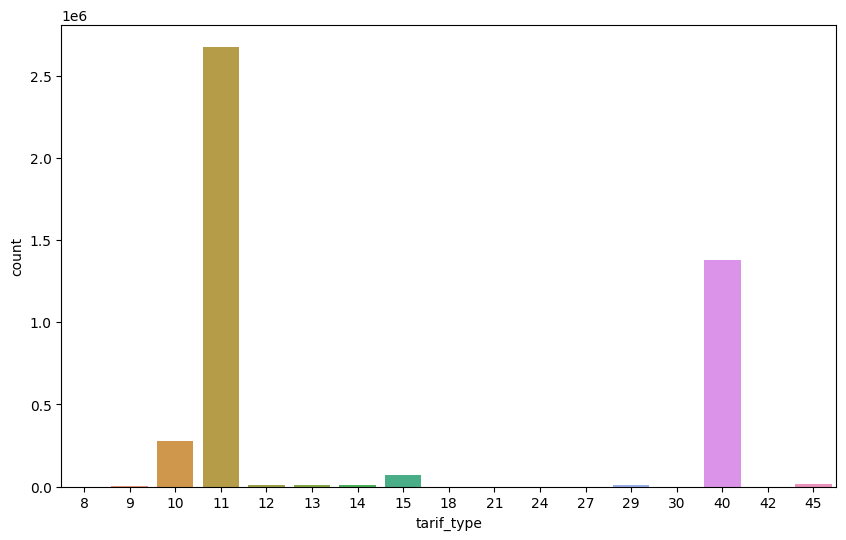

In [45]:
# Distribution of tarif type 
plt.figure(figsize=[10,6])
sns.countplot(data=df2, x='tarif_type')

In [46]:
# Check the unique values in 'counter_type'
df2['counter_type'].value_counts()

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64

<AxesSubplot:xlabel='counter_type', ylabel='count'>

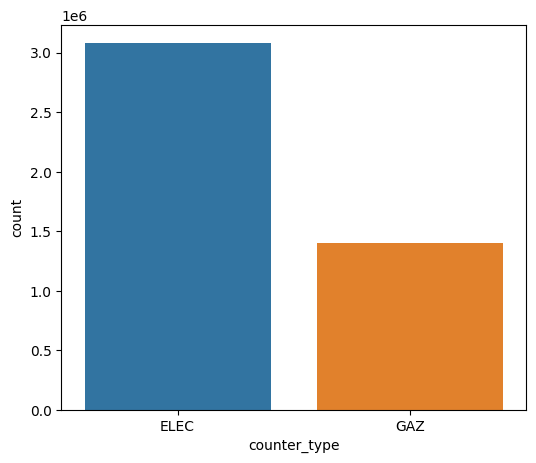

In [47]:
# Counter type distribution
plt.figure(figsize=[6,5])
sns.countplot(data=df2, x='counter_type')

The column "counter_type" contains obviously categorical values. We will use one-hot-encoding to create dummy variables instead of that.

In [48]:
# One-hot-encoding for 'counter_type' column
countyp_du = pd.get_dummies(df2['counter_type'],drop_first=True)
df2.drop(['counter_type'],axis=1,inplace=True)
df2 = pd.concat([df2, countyp_du],axis=1)

In [49]:
df2.head(2)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,invoice_year,invoice_month,GAZ
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,2014,3,0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,2013,3,0


In [50]:
# Check the unique values for the column 'counter_statue'
df2['counter_statue'].unique()

array([0, 1, 5, 4, 3, 2, 769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420], dtype=object)

In [51]:
# Check unique values for 'counter_statue'
df2['counter_statue'].value_counts()

0         4346960
1           73496
0           32048
5           20495
4            2706
1             540
3             258
5             144
2              32
4              23
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

There are 17 different values in the "counter_statue" column, but we find that some of them represent the same category.  
For example, 0 and '0', 1 and '1' etc. This often happens if there is no fixed standard for data collection. We need to reduce the number of values for each category to one.   
There are also some weird values in the column, probably because of the personal mistake. The amount of those weird values is very small. So we will mark them as np.NaN as missing values.

In [52]:
# replace those weird values in the column to be missing value
df2['counter_statue']=df2['counter_statue'].replace(['A',46,618,769,269375,420], np.NaN)
# change the data type as a standard one
df2['counter_statue']=df2.counter_statue.astype('float')

In [53]:
df2['counter_statue'].unique()

array([ 0.,  1.,  5.,  4.,  3.,  2., nan])

In [54]:
df2['counter_statue'].value_counts()

0.0    4379008
1.0      74036
5.0      20639
4.0       2729
3.0        258
2.0         32
Name: counter_statue, dtype: int64

<AxesSubplot:xlabel='reading_remarque', ylabel='count'>

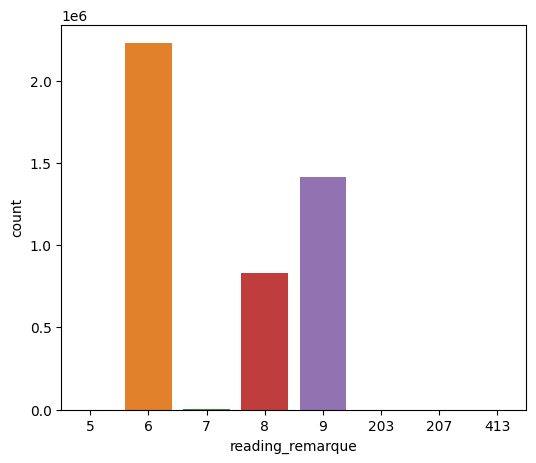

In [55]:
# Distribution of 'Reading_remarque'
plt.figure(figsize=[6,5])
sns.countplot(data=df2, x='reading_remarque')

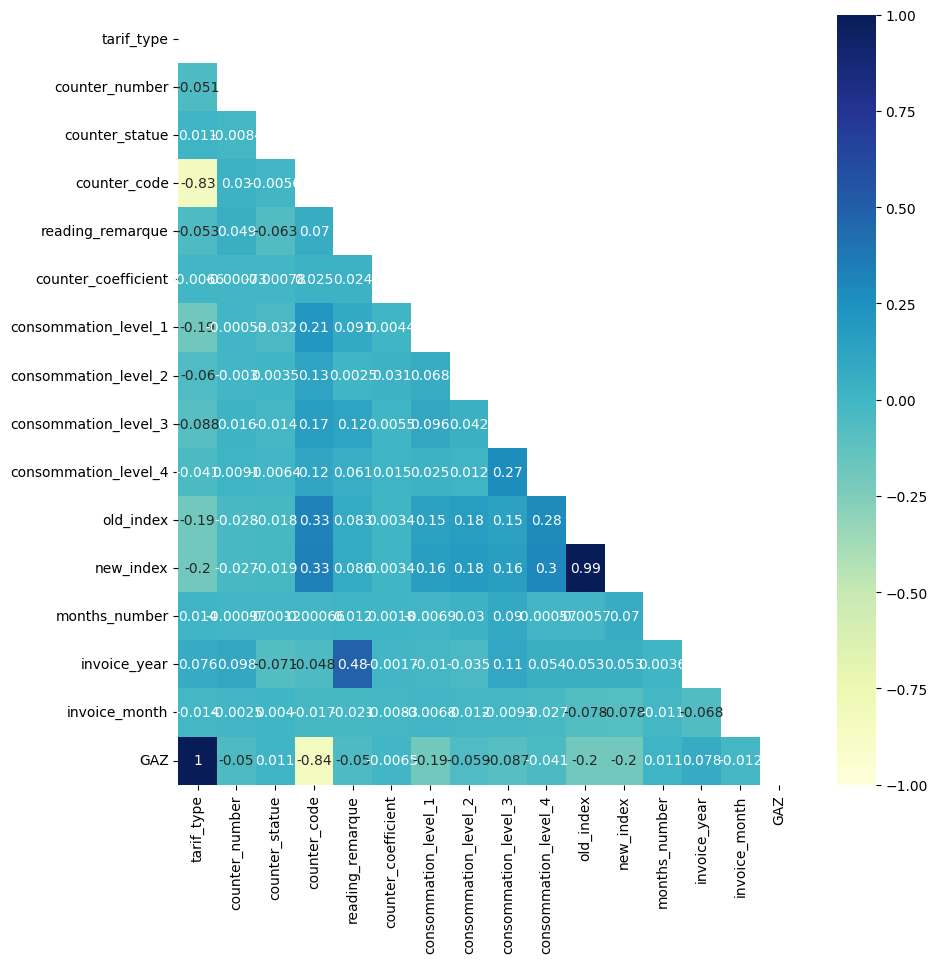

In [56]:
# Correlation heatmap for the invoice dataset
plt.figure(figsize = [10,10])
correlations = df2.corr()
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");

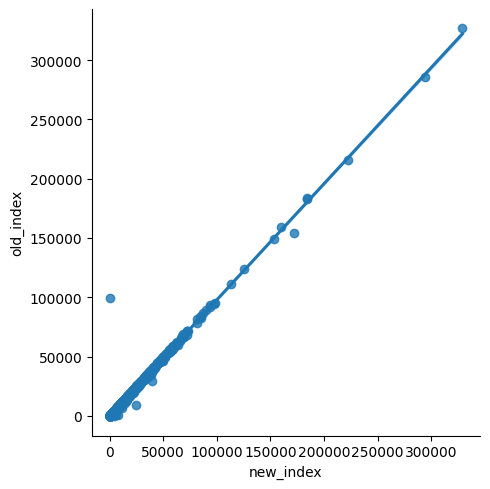

In [57]:
# Check the relation between new_index and old_index
sns.lmplot(data= df2.sample(1000), x="new_index", y="old_index")

The "new_idex" and "old_idex" are linear correlated. So we will drop one of them later for the further analysis.

<AxesSubplot:xlabel='tarif_type', ylabel='GAZ'>

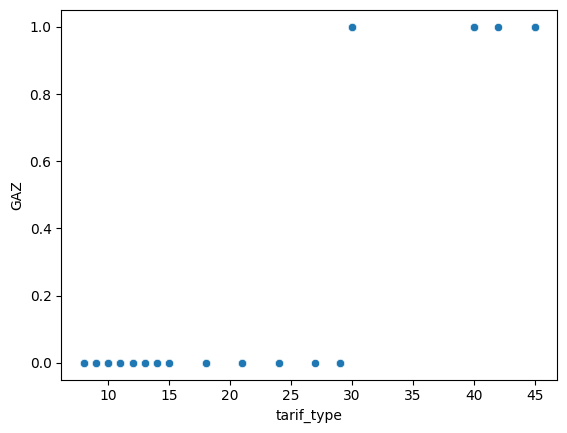

In [58]:
# Check the relation between 'tarif_type' and 'GAZ'(counter type)
sns.scatterplot(data= df2, x="tarif_type", y="GAZ")

Seems that the 'tarif_type' and 'GAZ'(counter type) have a strong relationship. So we should drop one of them in the future if we choose features for the model building.

### Combine the Client Dataset and Invoice Dataset

In [59]:
# Combine the two tables with Left Join
df = df_train = df1.merge(df2, left_on='client_id', right_on='client_id', how='left')
df.shape

(4476749, 23)

In [60]:
df.head(20)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,invoice_year,invoice_month,GAZ
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0.0,...,82,0,0,0,14302,14384,4,2014,3,0
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0.0,...,1200,184,0,0,12294,13678,4,2013,3,0
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0.0,...,123,0,0,0,14624,14747,4,2015,3,0
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0.0,...,102,0,0,0,14747,14849,4,2015,7,0
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0.0,...,572,0,0,0,15066,15638,12,2016,11,0
5,60,train_Client_0,11,101,31/12/1994,0.0,2017-07-17,11,1335667,0.0,...,314,0,0,0,15638,15952,8,2017,7,0
6,60,train_Client_0,11,101,31/12/1994,0.0,2018-12-07,11,1335667,0.0,...,541,0,0,0,15952,16493,12,2018,12,0
7,60,train_Client_0,11,101,31/12/1994,0.0,2019-03-19,11,1335667,0.0,...,585,0,0,0,16493,17078,8,2019,3,0
8,60,train_Client_0,11,101,31/12/1994,0.0,2011-07-22,11,1335667,0.0,...,1200,186,0,0,7770,9156,4,2011,7,0
9,60,train_Client_0,11,101,31/12/1994,0.0,2011-11-22,11,1335667,0.0,...,1082,0,0,0,9156,10238,4,2011,11,0


In [61]:
# drop some of the useless columns
df.drop(['creation_date', 'old_index'],axis=1, inplace=True)
df.head()

,disrict,client_id,client_catg,region,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,new_index,months_number,invoice_year,invoice_month,GAZ
0,60,train_Client_0,11,101,0.0,2014-03-24,11,1335667,0.0,203,...,1,82,0,0,0,14384,4,2014,3,0
1,60,train_Client_0,11,101,0.0,2013-03-29,11,1335667,0.0,203,...,1,1200,184,0,0,13678,4,2013,3,0
2,60,train_Client_0,11,101,0.0,2015-03-23,11,1335667,0.0,203,...,1,123,0,0,0,14747,4,2015,3,0
3,60,train_Client_0,11,101,0.0,2015-07-13,11,1335667,0.0,207,...,1,102,0,0,0,14849,4,2015,7,0
4,60,train_Client_0,11,101,0.0,2016-11-17,11,1335667,0.0,207,...,1,572,0,0,0,15638,12,2016,11,0


In [62]:
# How many unique entries do the featuers have?
df.nunique()

disrict                      4
client_id               135493
client_catg                  3
region                      25
target                       2
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue               6
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
new_index               157980
months_number             1370
invoice_year                43
invoice_month               12
GAZ                          2
dtype: int64

In [103]:
df.describe()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,new_index,months_number,invoice_year,invoice_month,GAZ
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476702e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,6.348246e+01,1.194381e+01,2.103584e+02,7.887688e-02,2.012804e+01,1.230587e+11,4.221523e-02,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.834970e+04,4.483095e+01,2.012735e+03,6.273786e+00,3.121334e-01
std,3.273403e+00,6.022452e+00,1.035828e+02,2.695465e-01,1.347256e+01,1.657267e+12,3.745860e-01,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.095321e+04,3.128335e+03,4.104397e+00,3.432981e+00,4.633640e-01
min,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.977000e+03,1.000000e+00,0.000000e+00
25%,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00,1.100000e+01,1.211080e+05,0.000000e+00,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.056000e+03,4.000000e+00,2.010000e+03,3.000000e+00,0.000000e+00
50%,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00,1.100000e+01,4.945610e+05,0.000000e+00,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,8.192000e+03,4.000000e+00,2.013000e+03,6.000000e+00,0.000000e+00
75%,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00,4.000000e+01,1.115161e+06,0.000000e+00,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.234300e+04,4.000000e+00,2.016000e+03,9.000000e+00,1.000000e+00
max,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00,4.500000e+01,2.798115e+13,5.000000e+00,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.870972e+06,6.366240e+05,2.019000e+03,1.200000e+01,1.000000e+00


In [63]:
# define a small subset of the big dataset for convenience
dfsmall = df.sample(1000)

In [64]:
df.groupby('client_id').nunique().max(axis=0)

disrict                   1
client_catg               1
region                    1
target                    1
invoice_date            159
tarif_type                6
counter_number            8
counter_statue            4
counter_code              6
reading_remarque          4
counter_coefficient       4
consommation_level_1    245
consommation_level_2    189
consommation_level_3     62
consommation_level_4     68
new_index               373
months_number           184
invoice_year             15
invoice_month            12
GAZ                       2
dtype: int64

In [66]:
# Check the fraud records for the invoices before 2005
df.query('invoice_date < "2005-01-01" & target ==1')

,disrict,client_id,client_catg,region,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,new_index,months_number,invoice_year,invoice_month,GAZ


In [104]:
# Check how many transaction records are before 2005
len(df.query('invoice_year < 2005'))

22112

In [68]:

len(df.query('months_number > 12'))

24041

In [69]:
# percentage of the fraud transactions
len(df[df['target']==1]) / len(df)

0.07887688141550933

<Figure size 1600x1000 with 0 Axes>

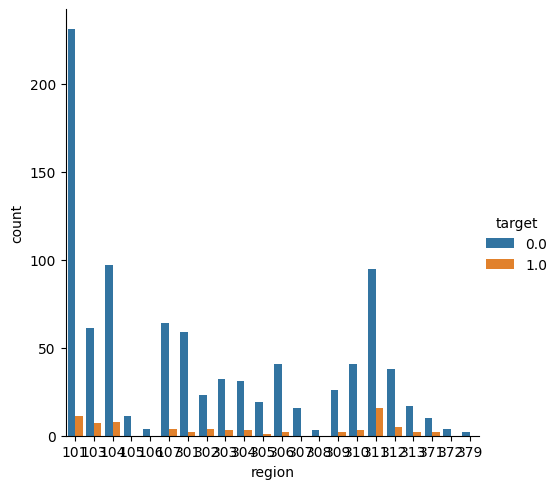

In [70]:
# Check the region distribution for fraud and non-fraud transactions
plt.figure(figsize=[16,10])
sns.catplot(data=dfsmall, kind='count', x='region', hue='target');

<Figure size 1000x800 with 0 Axes>

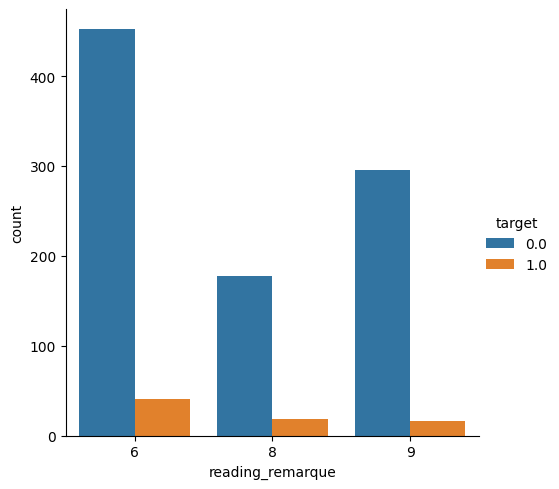

In [71]:
# Check the reading_remarque distribution for fraud and non-fraud transactions
plt.figure(figsize=[10,8])
sns.catplot(data=dfsmall, kind='count', x='reading_remarque', hue='target');

<AxesSubplot:xlabel='invoice_year', ylabel='consommation_level_1'>

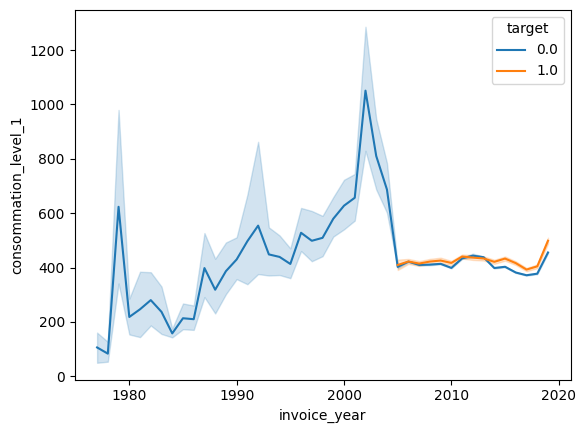

In [105]:
# Plot the consumption based on the invoice year for different target value
sns.lineplot(x="invoice_year", y="consommation_level_1", hue="target", data=df)

<AxesSubplot:xlabel='consommation_level_2', ylabel='target'>

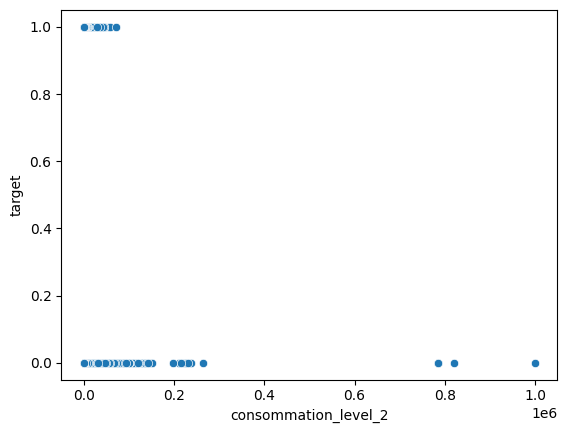

In [73]:
df_2005 = df[df['invoice_year']>=2005]
col = 'consommation_level_2'
mu = df_2005[col].median()
sns.scatterplot(data=df_2005, x=col, y="target",)

<AxesSubplot:xlabel='invoice_year', ylabel='consommation_level_1'>

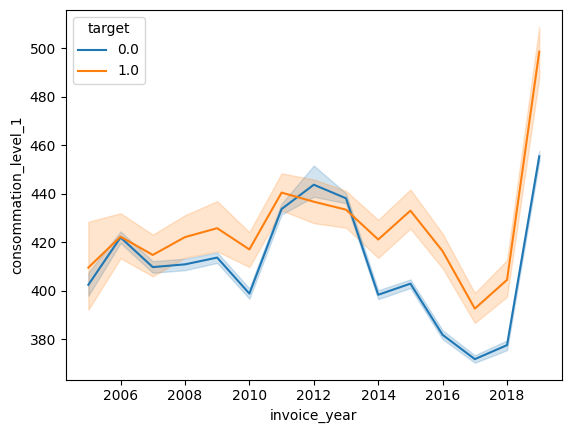

In [74]:
# Plot the consumption_level_1 after 2005 for different target value
sns.lineplot(x="invoice_year", y="consommation_level_1",
             hue="target", data=df_2005)

<AxesSubplot:xlabel='invoice_year', ylabel='consommation_level_2'>

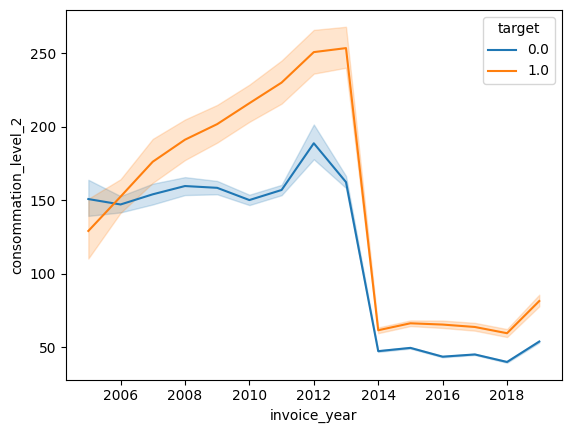

In [75]:
# Plot the consumption_level_2 after 2005 for different target value
sns.lineplot(x="invoice_year", y="consommation_level_2", hue="target", data=df_2005)

<AxesSubplot:xlabel='invoice_year', ylabel='consommation_level_3'>

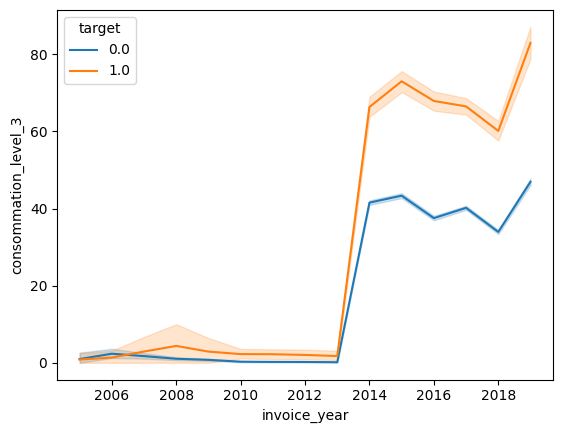

In [76]:
# Plot the consumption_level_3 after 2005 for different target value
sns.lineplot(x="invoice_year", y="consommation_level_3", hue="target", data=df_2005)

<AxesSubplot:xlabel='invoice_year', ylabel='consommation_level_4'>

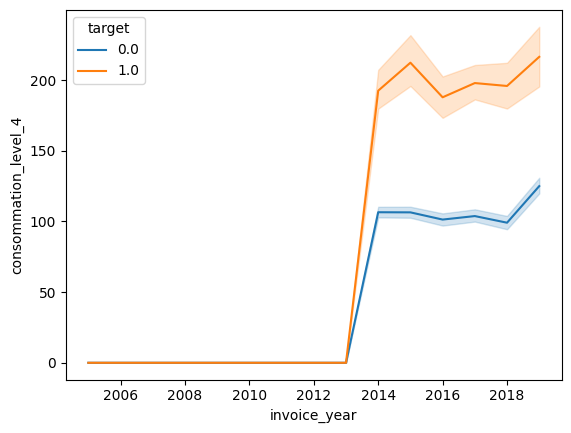

In [77]:
# Plot the consumption_level_4 after 2005 for different target value
sns.lineplot(x="invoice_year", y="consommation_level_4", hue="target", data=df_2005)

[(325.0, 600.0)]

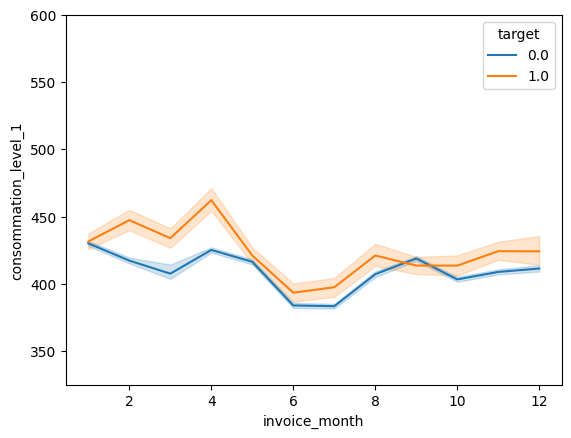

In [101]:
# Plot the consumption_level_1 based on the invoice month for different target values
lp1 = sns.lineplot(x="invoice_month", y="consommation_level_1", hue="target", data=df)
lp1.set(ylim=(325, 600))

In [102]:
# sns.lineplot(x="invoice_month", y="consommation_level_1", hue="target", data=df_2005)

[(0.0, 275.0)]

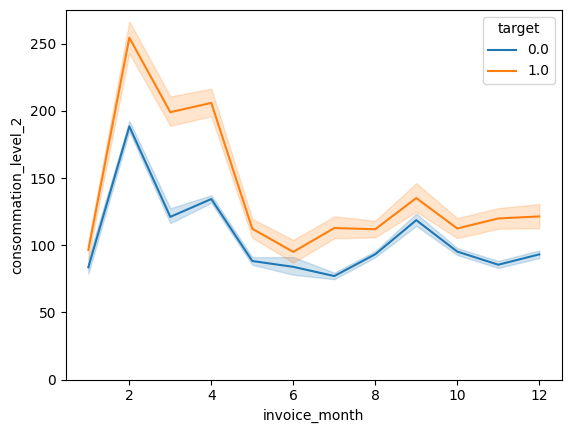

In [100]:
# Plot the consumption_level_2 based on the invoice month for different target values
lp2 = sns.lineplot(x="invoice_month", y="consommation_level_2", hue="target", data=df)
lp2.set(ylim=(0, 275))

[(0.0, 275.0)]

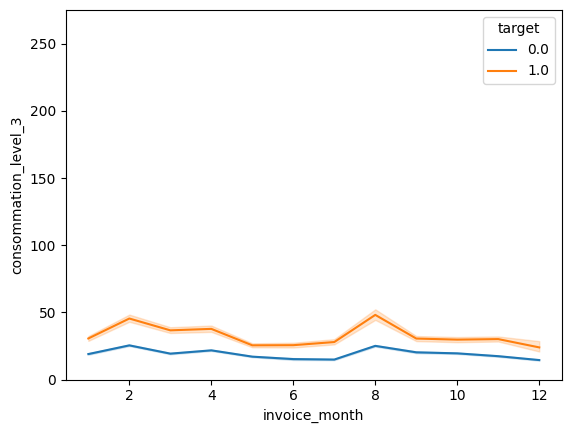

In [99]:
# Plot the consumption_level_3 based on the invoice month for different target values
lp3 = sns.lineplot(x="invoice_month", y="consommation_level_3", hue="target", data=df)
lp3.set(ylim=(0, 275))

[(0.0, 275.0)]

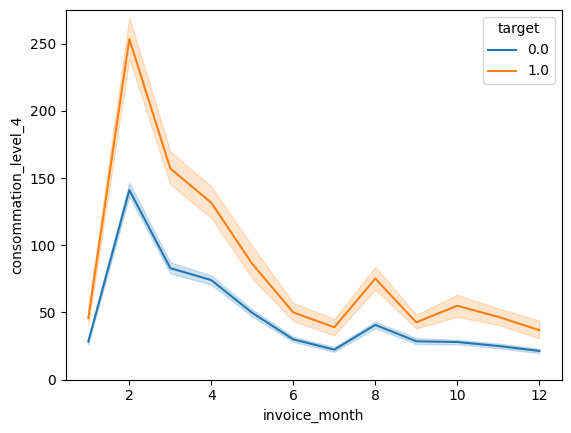

In [98]:
# Plot the consumption_level_4 based on the invoice month for different target values
lp4 = sns.lineplot(x="invoice_month", y="consommation_level_4", hue="target", data=df)
lp4.set(ylim=(0, 275))

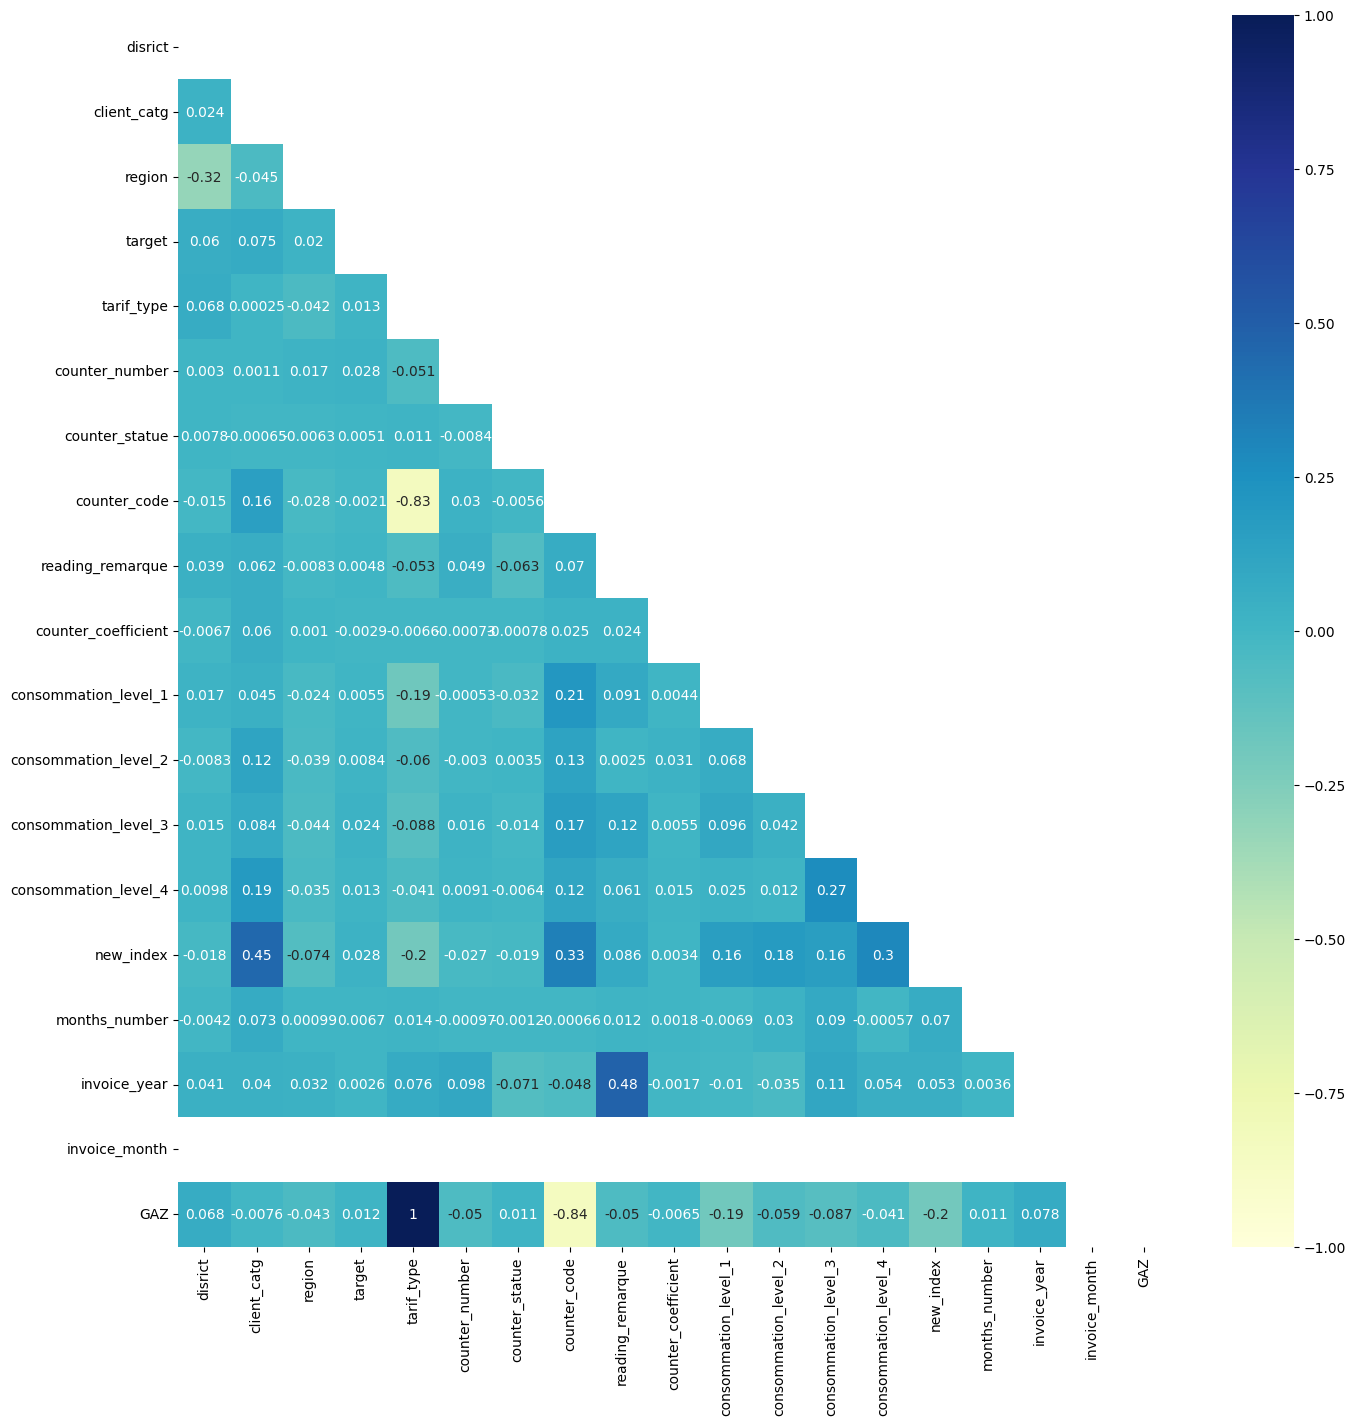

In [ ]:
# Correlation heatmap for the whole dataset
plt.figure(figsize = [16,16])
correlations = df.corr()
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");

## Check the Test Dataset

In [107]:
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)
df3.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [108]:
# Combine the two tables with Left Join
df_test = df3.merge(df4, left_on='client_id', right_on='client_id', how='left')
df_test.shape

(1939730, 20)

In [110]:
# Check the fraud records for the invoices before 2005
len(df_test.query('invoice_date < "2005-01-01"'))

9357

In [ ]:
dfsmall[['region', 'target']].groupby('region').mean().sort_values('target')

,target
region,
379,0.000000
313,0.000000
312,0.000000
105,0.000000
106,0.000000
372,0.000000
309,0.037037
310,0.047619
301,0.050000


In [ ]:
dfsmall.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'target',
       'invoice_date', 'tarif_type', 'counter_number', 'counter_statue',
       'counter_code', 'reading_remarque', 'counter_coefficient',
       'consommation_level_1', 'consommation_level_2', 'consommation_level_3',
       'consommation_level_4', 'new_index', 'months_number', 'invoice_year',
       'invoice_month', 'GAZ'],
      dtype='object')

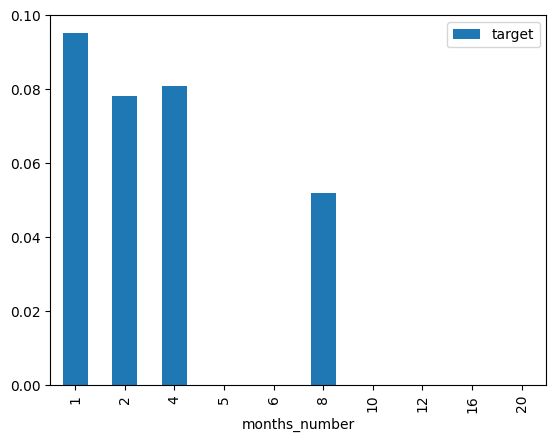

In [ ]:

col = 'months_number'

dfsmall[[col, 'target']].groupby(col).mean().plot.bar();

In [ ]:
sum(df['months_number'] > 12)

24041

In [ ]:
mask = df['months_number'] > 25
df[mask]

,disrict,client_id,client_catg,region,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,new_index,months_number,invoice_year,invoice_month,GAZ
10798,62,train_Client_10030,11,310,1.0,2013-01-29 00:04:00,11,25411,0.0,413,...,1,6040,0,0,0,23875,42,2013,1,0
11155,60,train_Client_100307,11,101,0.0,2016-01-20 00:09:00,10,233298,0.0,202,...,1,0,0,0,0,41916,32,2016,1,0
19356,60,train_Client_100520,11,101,0.0,2015-01-12 00:01:00,10,86108,0.0,202,...,1,482,0,0,0,18123,28,2015,1,0
20211,60,train_Client_100551,11,101,0.0,2010-01-30 00:08:00,11,1099471,0.0,467,...,1,5,1200,10744,0,17815,25778,2010,1,0
20212,60,train_Client_100551,11,101,0.0,2010-01-05 00:06:00,11,1099471,0.0,467,...,1,5,1200,10566,0,9971,17815,2010,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458605,69,train_Client_99506,11,104,0.0,2019-01-19 00:08:00,40,6873055,0.0,5,...,1,3116,0,0,0,7947,32,2019,1,1
4468015,69,train_Client_99772,11,104,0.0,2015-01-23 00:11:00,11,925896,0.0,203,...,1,3414,0,0,0,12107,28,2015,1,0
4475499,69,train_Client_99963,11,104,0.0,2014-01-17 00:07:00,11,41215,0.0,413,...,1,5600,2800,5600,512,65925,28,2014,1,0
4476539,60,train_Client_99992,11,101,0.0,2016-01-21 00:10:00,40,65938,0.0,5,...,1,0,0,0,0,0,26,2016,1,1


In [ ]:
df['months_number'].value_counts()

4         3680478
8          278772
2          270909
1          113266
12          54328
           ...   
430834          1
179002          1
186166          1
81499           1
463554          1
Name: months_number, Length: 1370, dtype: int64

In [ ]:
(df['months_number'] // 12).value_counts()

0        4398380
1          73283
2           2996
3            498
4            128
          ...   
36710          1
16254          1
35902          1
14916          1
38629          1
Name: months_number, Length: 1282, dtype: int64

In [ ]:
sr_explore_months = pd.Series(df['months_number'], 
                              index=pd.DatetimeIndex(df['invoice_date']));

In [ ]:
sr_explore_months

invoice_date
2014-01-24 00:03:00   NaN
2013-01-29 00:03:00   NaN
2015-01-23 00:03:00   NaN
2015-01-13 00:07:00   NaN
2016-01-17 00:11:00   NaN
                       ..
2005-01-19 00:08:00   NaN
2005-01-19 00:12:00   NaN
1996-01-25 00:09:00   NaN
1996-01-28 00:05:00   NaN
1996-01-25 00:01:00   NaN
Name: months_number, Length: 4476749, dtype: float64

In [ ]:
df['months_number']

0           4
1           4
2           4
3           4
4          12
           ..
4476744     8
4476745     4
4476746     4
4476747     4
4476748     4
Name: months_number, Length: 4476749, dtype: int64

In [ ]:
df.dtypes

disrict                          int64
client_id                       object
client_catg                      int64
region                           int64
target                         float64
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                 float64
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
new_index                        int64
months_number                    int64
invoice_year                     int64
invoice_month                    int64
GAZ                              uint8
dtype: object